<a href="https://colab.research.google.com/github/Adolphsus/CC3001/blob/main/CC3001_Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 2023-1 - Tarea 6: Quicksort
# Nombre: Adolfo Arenas P.
Profesores: Iván Sipirán, Nelson Baloian, Patricio Poblete




En esta tarea, usted debe comparar el desempeño de la versión original de Quicksort con el de la variante "Mediana de 3". En la primera, el método de partición debe elegir el pivote como el primer elemento del sub arreglo que está particionando. En la segunda, el pivote debe elegirse como la mediana entre el primero, el del medio y el último elemento. Usted debe entregar un link a su tarea en `colab`.

---
# Quicksort original




La versión que se vio en cátedra de Quicksort elige el pivote como un elemento escogido al azar de entre los del arreglo. Para esta tarea vamos a elegir el pivote como el primer elemento del subarreglo para evitar usar la función random.randint() de python que puede ser muy lenta. Dado que para esta tarea los arreglos a ordenar se generarán de manera aleatoria, el primer elemento de la serie se puede ver como un elemento escogido al azar. Sin embargo, esta no es una práctica recomendable en la realidad, ya que si el arreglo viene ordenado, esto llevará a que se tenga el peor caso de Quicksort. La implementación que usaremos de Quicksort es la siguiente:

In [ ]:
def quicksort(a):
    global counter        #Contador, basicamente se implemento de igual manera que
    counter = 0           #en Qs3
    qsort(a,0,len(a)-1)
    return counter

def qsort(a,i,j): # ordena a[i],...,a[j]
    if i<j: # quedan 2 o más elementos por ordenar
        k=particion(a,i,j)
        qsort(a,i,k-1)
        qsort(a,k+1,j)

def particion(a,i,j):
    global counter # particiona a[i],...,a[j], retorna posición del pivote
    # a[i] es el pivote
    s=i # invariante: a[i+1..s]<=a[i], a[s+1..t]>a[i]
    for t in range(s,j):
        counter+=1
        if a[t+1]<=a[i]:
            (a[s+1],a[t+1])=(a[t+1],a[s+1])
            s=s+1
    # mover pivote al centro
    (a[i],a[s])=(a[s],a[i])
    return s

In [ ]:
def chequea_orden(a):
    print("Ordenado" if np.all(a[:-1]<=a[1:]) else "Desordenado")

In [ ]:
import numpy as np
a = np.random.random(40000)
chequea_orden(a)
quicksort(a)
chequea_orden(a)

Desordenado
Ordenado


# La tarea: Quicksort con mediana de tres

Usted debe programar una partición que determine el pivote como la mediana de tres elementos escogido entre el primer, el del medio y el último del segmento a particionar. Para esto, debe modificar el algoritmo de partición de modo que  re-ordene estos 3 elementos dejando en $a[i]$ el mínimo de los 3, en $a[i+1]$ la mediana de los 3 y en $a[j]$ el máximo de los 3. Luego, se aplica el algoritmo de partición ya conocido al segmento $a[i+2],\ldots,a[j-1]$, con $a[i+1]$ como pivote. Al terminar, el pivote se mueve al centro y se retorna su posición.

Otro cambio que se debe hacer es tratar los casos de arreglos de tamaño $0$, $1$ y $2$ como casos de borde, y aplicar ``qsort`` recursivo solo a arreglos de tamaño mayor o igual a 3.

En el siguiente recuadro escriba su algoritmo modificado y luego ejecute las instrucciones de prueba del recuadro siguiente.

In [ ]:
#version encontrando 3 elementos al azar
import random
def quicksort3(a):
    global counter      #implementamos una variale global, la cual se aumenta en uno por cada ciclo for,
    counter = 0         #es decir, cada vez que haya un comparacion de elementos
    qsort3(a,0,len(a)-1)
    return counter      #retornamos el contador para luego usarlo para ver las comparaciones de Qs3

#Esta es la versión del apunte que deberá modificar
def qsort3(a,i,j): # ordena a[i],...,a[j]
    if i<j: # quedan 2 o más elementos por ordenar
        k=particionMedianaDe3(a,i,j)
        qsort3(a,i,k-1)
        qsort3(a,k+1,j)

#Implementar esta función de acuerdo al enunciado
def particionMedianaDe3(a,i,j):
    global counter
    if a[i]>a[j]:                   #Cheeckeamos que entre los elementos a[i], a[i+1] y a[j]
      (a[i],a[j])=(a[j],a[i])       #siempre quede en la pos. i el minimo, en i+1 la mediana y
    if a[i]>a[i+1]:                 #en la pos. j el maximo
      (a[i],a[i+1])=(a[i+1],a[i])
    if a[i+1]>a[j]:
        (a[i+1],a[j])=(a[j],a[i+1])
    # a[i+1] es el pivote
    s=i+1
    for t in range(s,j-1):                    #aqui usamos lo entregado en el enunciado teniendo el cuidado de cambiar
        counter+=1                            #i por i+1, pues ahora a[i+1] sera nuestro pivote y que llegue en el rango
        if a[t+1]<=a[i+1]:                    #hasta j-1, ya que asi particionaremos a[i+2],...,a[j-1] como es pedido
            (a[s+1],a[t+1])=(a[t+1],a[s+1])   #(notese que t va desde i+2 hasta j-1)
            s=s+1
    # mover pivote al centro
    (a[i+1],a[s])=(a[s],a[i+1])
    return s

In [ ]:
import numpy as np
a = np.random.random(40000)
print(a)
chequea_orden(a)
quicksort3(a)
print(a)
chequea_orden(a)

[0.61550774 0.75772035 0.66120371 ... 0.83154757 0.45409267 0.17471975]
Desordenado
[3.04714828e-05 1.06461801e-04 1.19045302e-04 ... 9.99925134e-01
 9.99926046e-01 9.99992730e-01]
Ordenado


Una vez programada la variante quicksort con mediana de tres, se le pide que mida el tiempo promedio que ambas versiones demoran en ordenar y cuente además el número promedio de comparaciones que se hacen dentro de la función de partición para las dos versiones operando sobre el mismo arreglo. Para eso debe crear arreglos con elementos generados al azar (use `np.random.random(n)`, donde `n` es el número de elementos), hacer una copia de él y ordenar uno con el método quicksort original y el otro con el método de mediana de tres, registrando el tiempo que demora cada ordenamiento y la cantidad de comparaciones. Este proceso debe ejecutarlo 15 veces y sacar el promedio del tiempo y de comparaciones para cada versión para un `n` fijo.

Repita el procedimiento para `n` = 100, 500, 1000, 5000, 10000, 20000 y 40000, completando así una tabla similar a la que se ve a continuación.

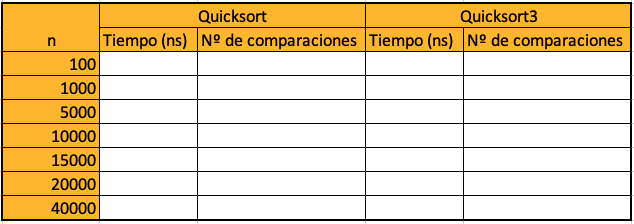


Una vez completada la tabla grafique sus resultados (de la forma que estime más conveniente presentarlos) e incluya el gráfico al final de  este documento. Para tomar el tiempo que demora un proceso puede usar la función `time.gettime_ns(0)` que registra el tiempo actual en nanosegundos que han pasado desde el 1/1/1970 00:00 horas. Puede usarlo de la siguiente manera:

In [ ]:
import time
a = np.random.random(1000)
t1 = time.clock_gettime_ns(0)
quicksort(a)
t2 = time.clock_gettime_ns(0)
print("el tiempo que demoró quicksort fue de ",(t2-t1),"nanosegundos")

el tiempo que demoró quicksort fue de  12594133 nanosegundos


In [ ]:
import time
a = np.random.random(1000)
t3 = time.clock_gettime_ns(0)
quicksort3(a)
t4 = time.clock_gettime_ns(0)
print("el tiempo que demoró quicksort3 fue de ",(t4-t3),"nanosegundos")

el tiempo que demoró quicksort3 fue de  9766911 nanosegundos


Para contar las comparaciones puede usar variables globales que se incrementan convenientemente. Solo cuente las comparaciones que se hacen en el proceso de partición (dentro del `for`). Tenga sumo cuidado de asegurarse que cada vez que se corra el experimento (ordenamiento del arreglo generado al azar por los dos métodos) estos reciban una copia del arreglo original desordenado y no una referencia al arreglo que ya fue ordenado en una instancia anterior. Programe las instrucciones que ejecuten el experimento descrito anteriormente, en el siguiente recuadro:

In [ ]:
import numpy as np
import time
ns = [100,1000, 5000, 10000, 15000, 20000, 40000]

for j in range(0,7):
    print('Tabla para un array a ordernar de: ', ns[j] )
    for i in range(0,15):
        a = np.random.random(ns[j])
        b = a.copy()  #Hacemos una copia de a para evitar ordenar con QS3 el arreglo ordenado por QS.
        t1 = time.clock_gettime_ns(0)
        c1=quicksort(a)
        t2 = time.clock_gettime_ns(0)
        t3 = time.clock_gettime_ns(0)
        c2=quicksort3(b)
        t4 = time.clock_gettime_ns(0)
        print(c1, c2, t2-t1, t4-t3)
    print('-----------------------')
#Lo anterior printea 15 veces los resultados de los experimentos para todos los valores de ns
#C1 son las comparaciones hechas por QS, C2 las comparaciones por QS3, t2-t1 el tiempo que demora QS
#y finalmente, t4-t2 el tiempo que demora QS3.

Tabla para un array a ordernar de:  100
631 491 763891 696622
712 491 513963 485815
613 476 519728 387458
569 421 391179 456845
803 446 514565 384898
618 439 667053 611347
624 437 721049 957335
632 455 540688 380662
674 449 437167 348497
563 428 380762 355673
759 455 799843 626740
575 409 445315 356506
684 427 415865 377090
598 398 433830 333564
621 459 405021 439034
-----------------------
Tabla para un array a ordernar de:  1000
12332 8085 10481536 6295322
11195 8517 8509643 6551525
11149 8327 7094455 6140673
10890 8363 6932074 6259492
11315 8373 7125886 6083854
10483 8351 7109158 6354005
10294 7983 11506102 6308524
10434 8715 6599958 10244392
10386 7899 6393784 5756296
11014 8032 10713245 6103014
11448 8086 7477330 7846400
11295 8116 9850946 6284454
10833 8281 6838321 6246233
10331 8082 6425266 5865137
11991 8914 8083502 6639765
-----------------------
Tabla para un array a ordernar de:  5000
73197 54775 53066735 50867046
76805 54698 60178828 40772301
75505 57690 43697507 40283282
6

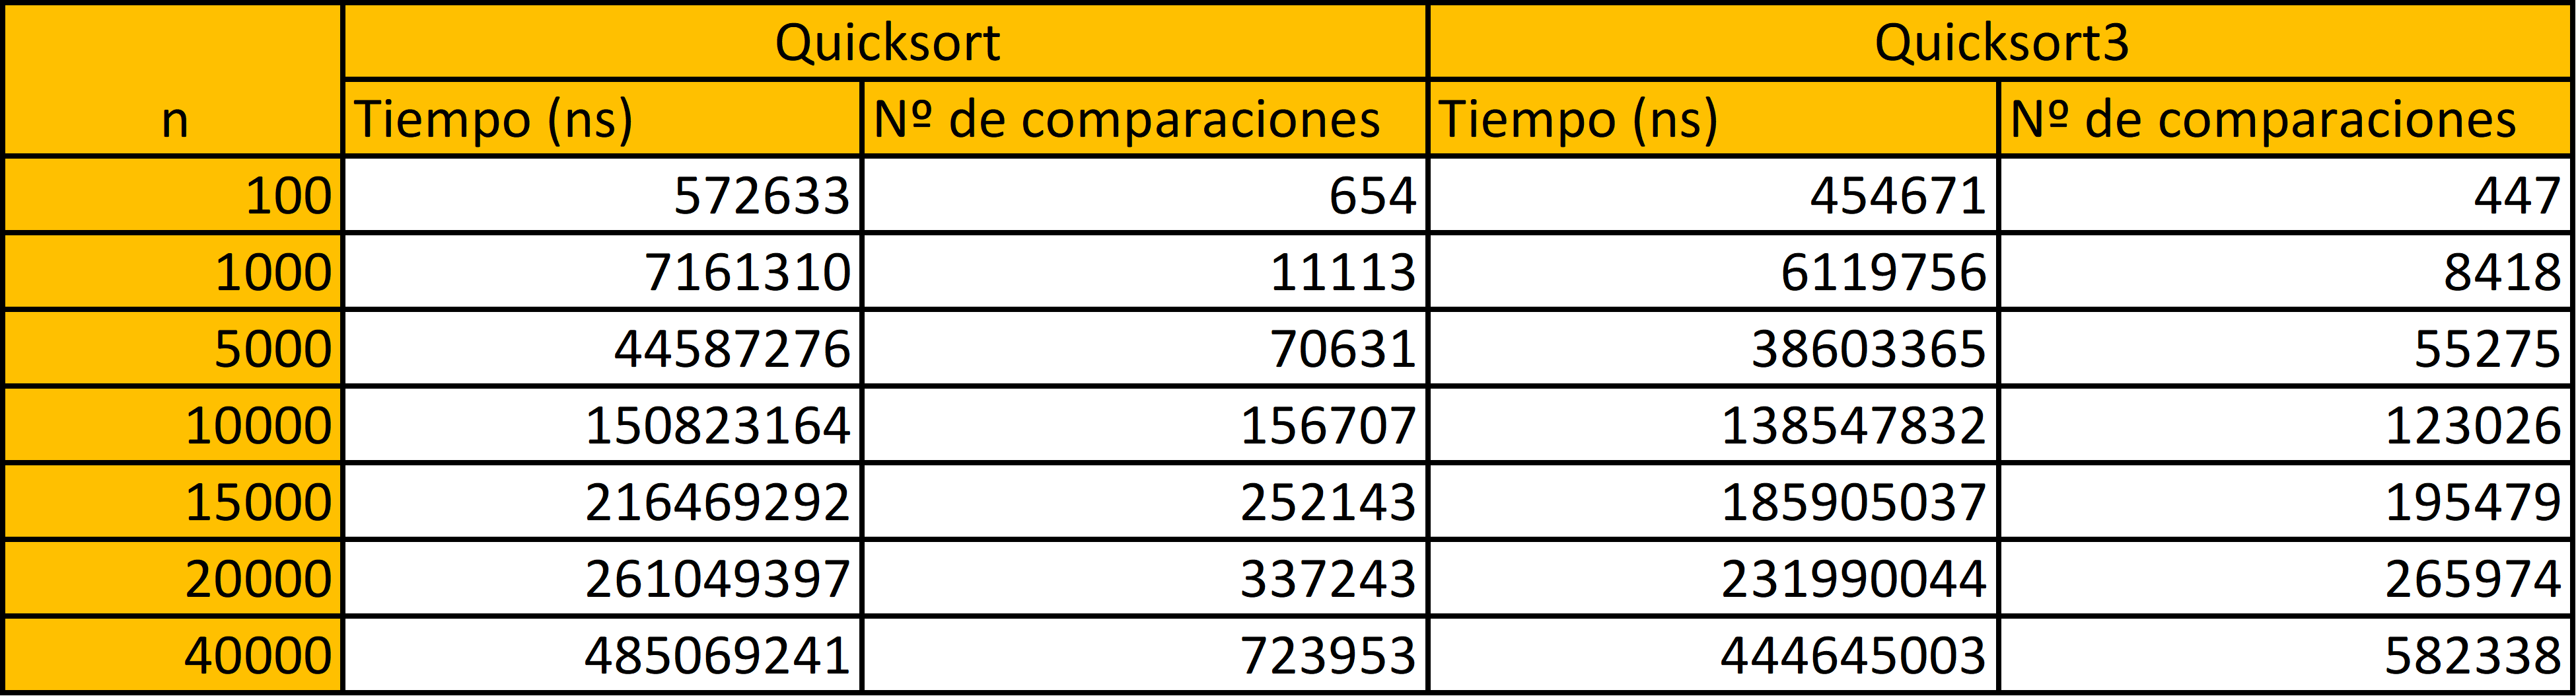

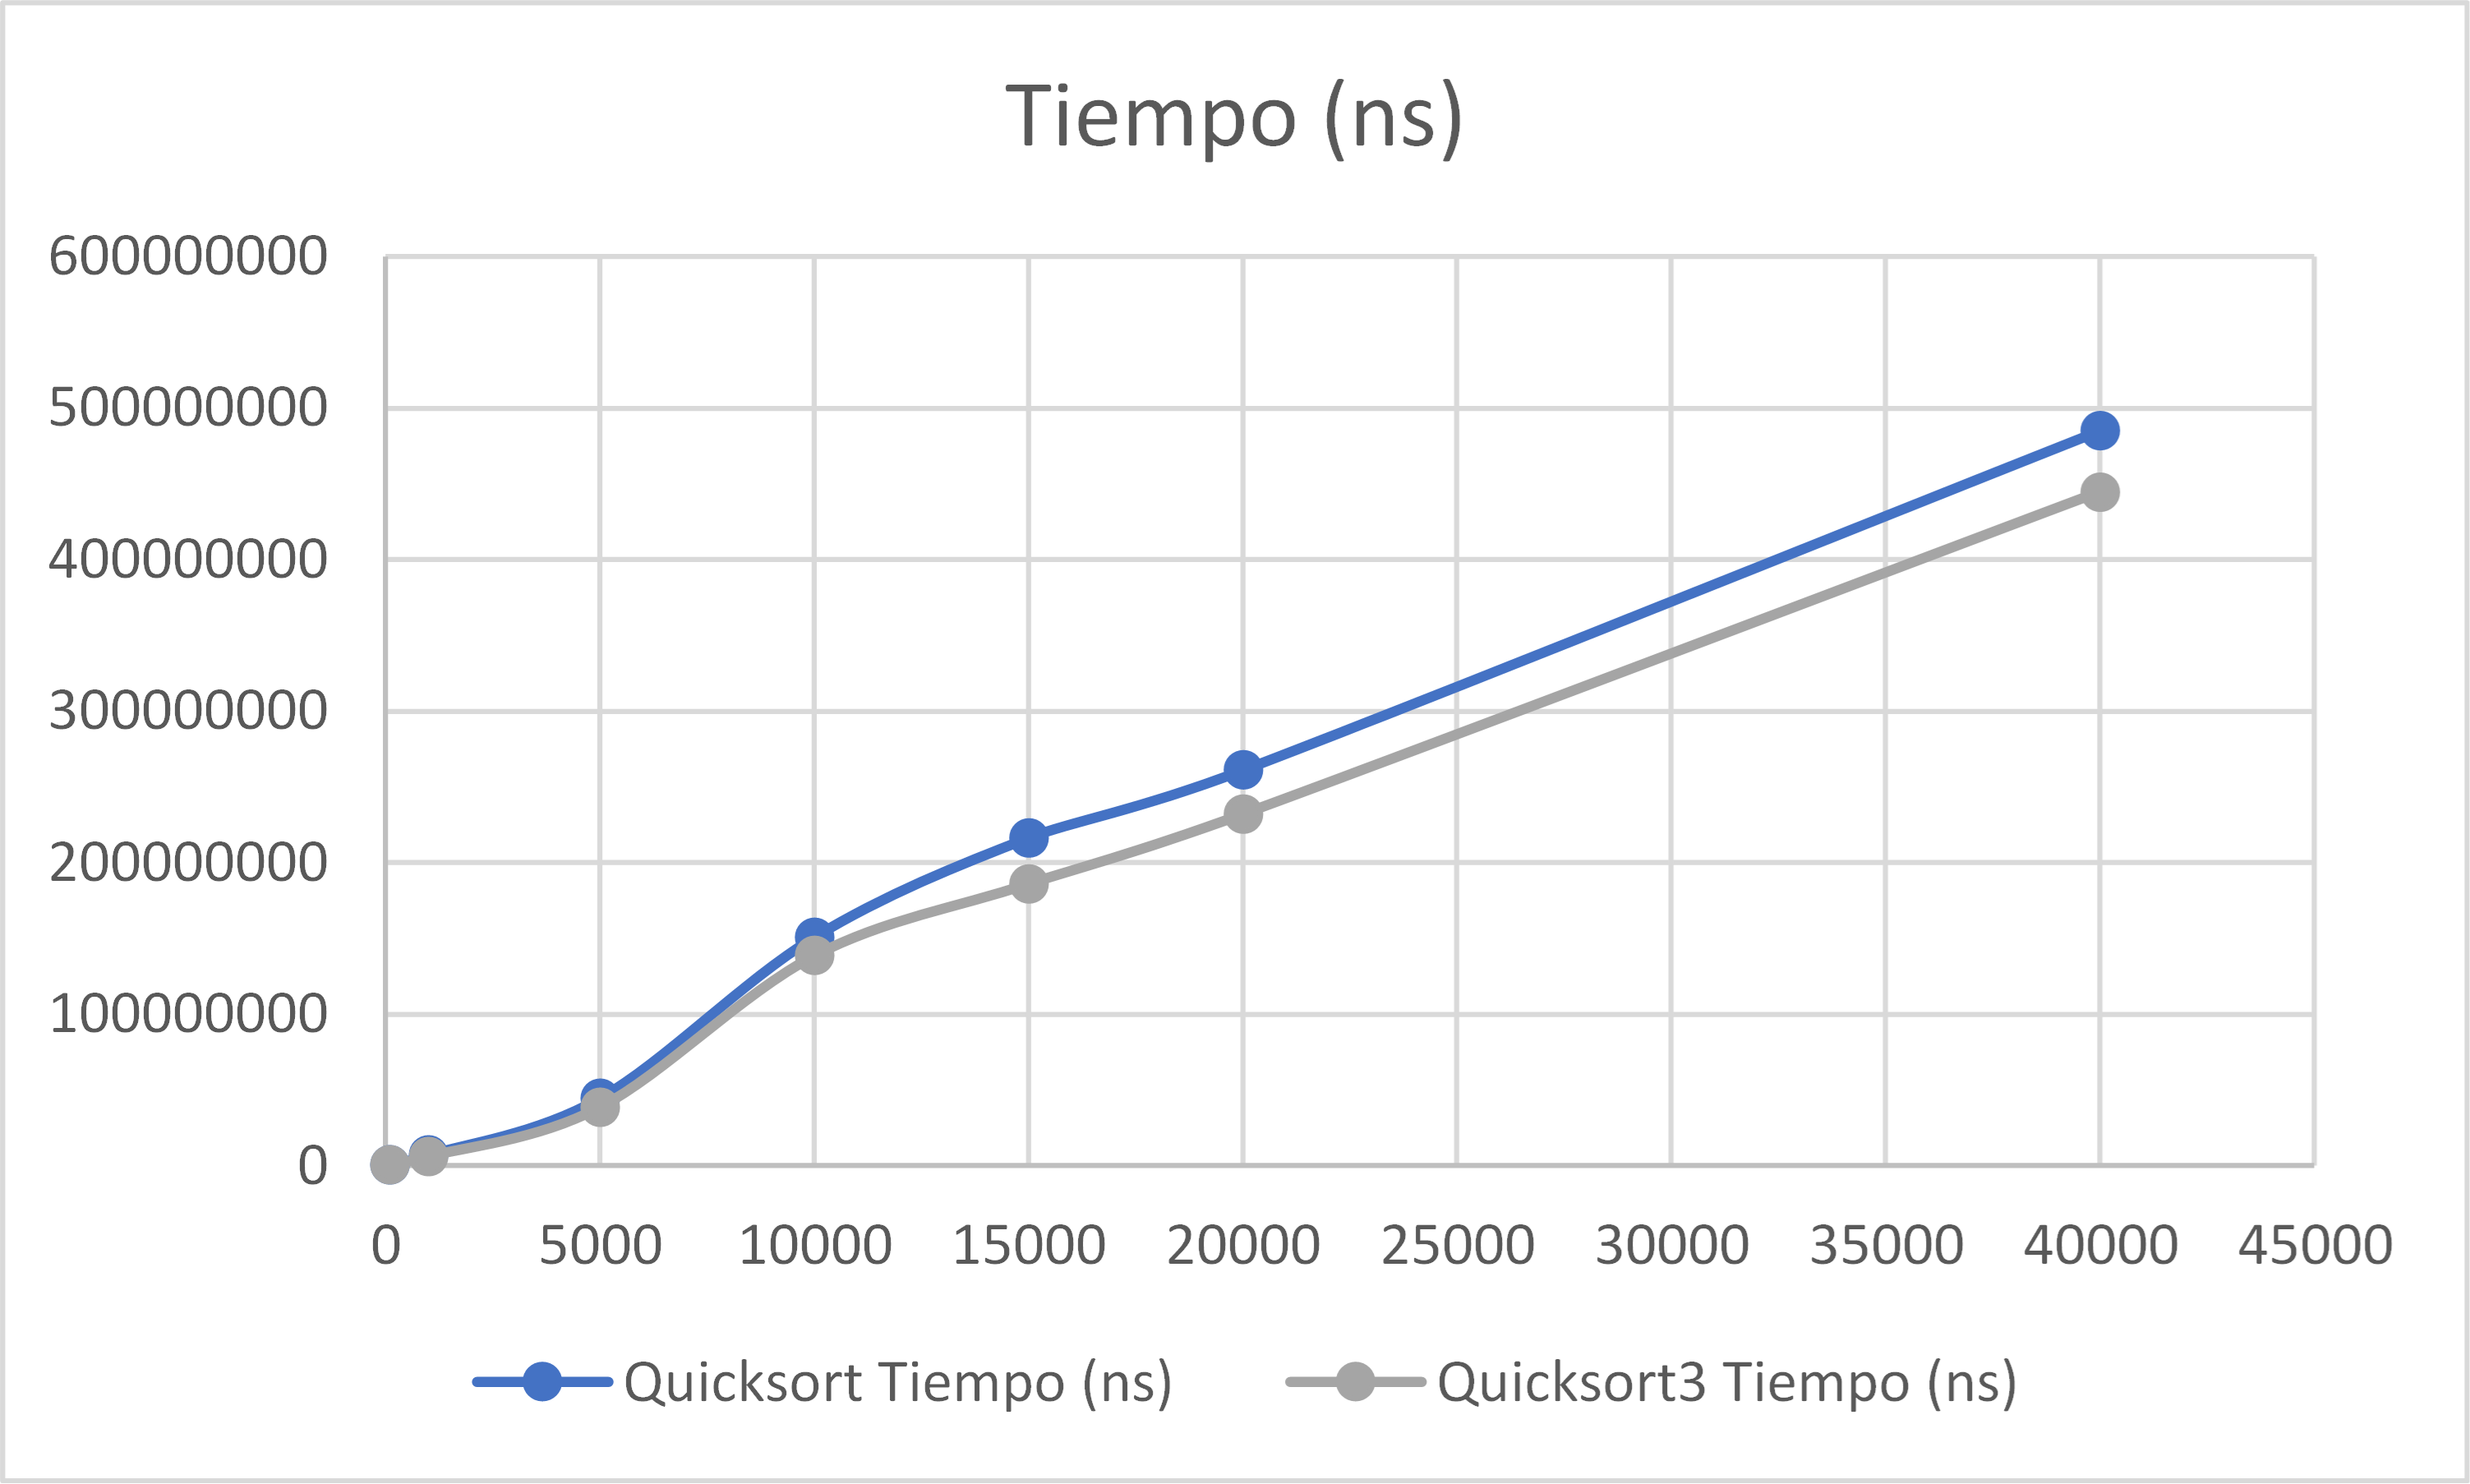

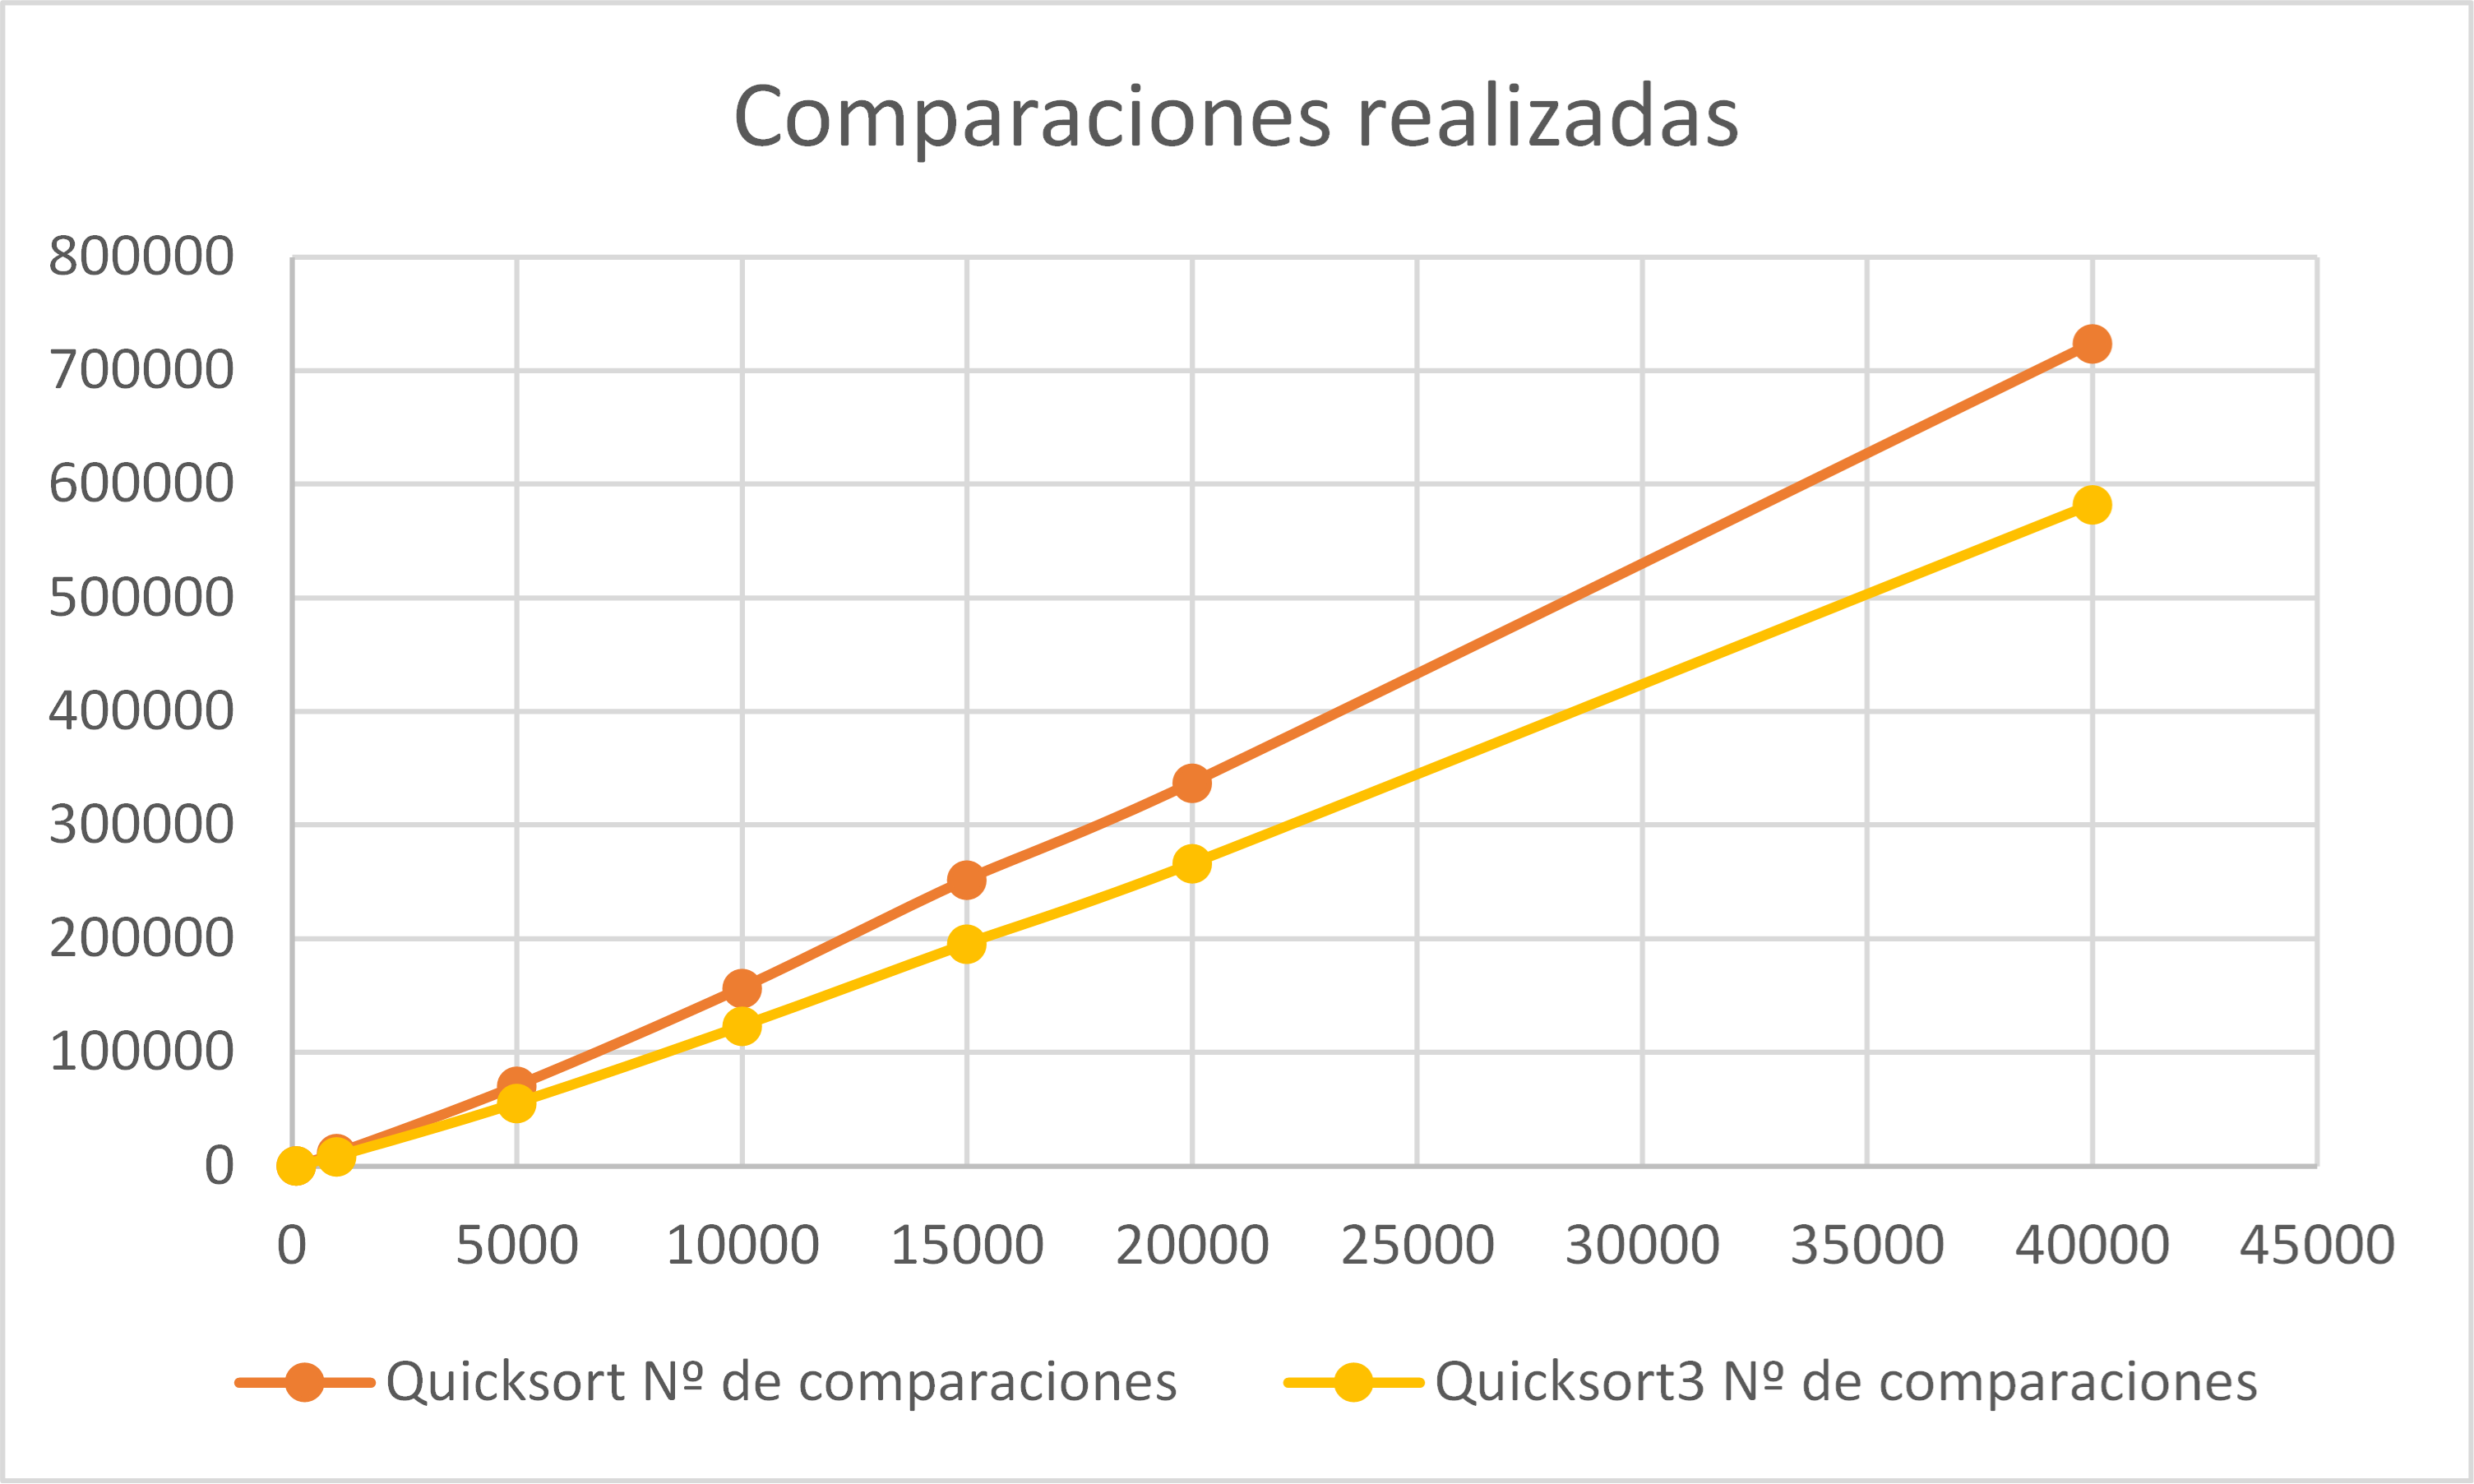